In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Toluca dataset

In [3]:
# Read the data
toluca_df = pd.read_csv('../code/data/toluca.csv')
toluca_df.head()

,lotSize,workHours
0,80,399
1,30,121
2,50,221
3,90,376
4,70,361


In [4]:
toluca_df.shape

(25, 2)

In [5]:
toluca_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
lotSize      25 non-null int64
workHours    25 non-null int64
dtypes: int64(2)
memory usage: 528.0 bytes


In [6]:
toluca_df.describe()

,lotSize,workHours
count,25.000000,25.000000
mean,70.000000,312.280000
std,28.722813,113.137645
min,20.000000,113.000000
25%,50.000000,224.000000
50%,70.000000,342.000000
75%,90.000000,389.000000
max,120.000000,546.000000


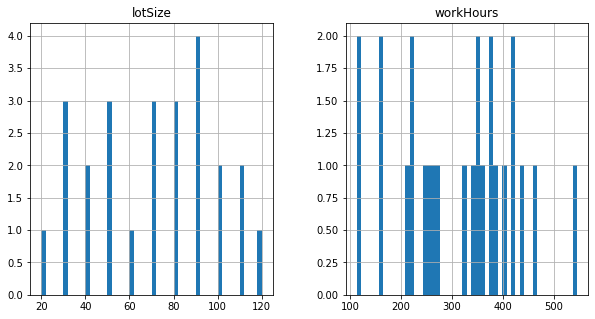

In [7]:
# histogram. 
toluca_df.hist(bins=50, figsize=(10,5))
plt.show()

In [8]:
# Correlation 
corr_matrix = toluca_df.corr()
corr_matrix['lotSize'].sort_values(ascending=False)
# Looks like 'workHours' is well correlated with 'lotSize'.

lotSize      1.000000
workHours    0.906385
Name: lotSize, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25c55f10>,
      dtype=object)

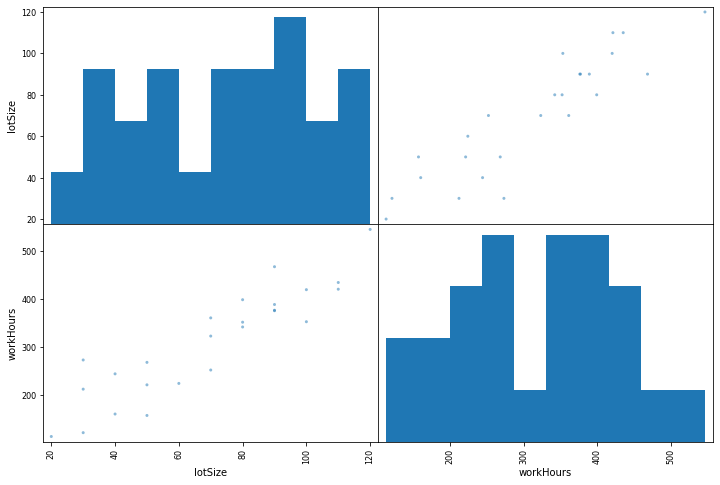

In [9]:
from pandas.plotting import scatter_matrix

scatter_matrix(toluca_df, figsize=(12, 8))

In [10]:
# Check missing values. 
toluca_df.isna().sum()

lotSize      0
workHours    0
dtype: int64

In [11]:
# Split train and test. 

def split_train_test(data, labels, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], labels[train_indices], data.iloc[test_indices], labels[test_indices]

In [12]:
# features: workHours, labels: lotSize
X_train, y_train, X_test, y_test = split_train_test(toluca_df.workHours, toluca_df.lotSize, 0.2)

In [13]:
X_train.head()

11    252
15    420
7     352
20    273
19    421
Name: workHours, dtype: int64

In [14]:
X_train = pd.DataFrame(X_train)
X_train.head()

,workHours
11,252
15,420
7,352
20,273
19,421


In [15]:
# Linear Regression

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression().fit(X_train, y_train) # Needs DataFrame type?

In [16]:
# Train the model. 
y_pred = lin_reg.predict(pd.DataFrame(X_test))
y_pred
# X_test[i] * coef_ (slope) - intercept_ (intercept) = y_pred[i]

array([49.43755042, 48.74953224, 80.85704722, 79.02233208, 54.02433828])

In [17]:
X_test

5     224
2     221
4     361
8     353
22    244
Name: workHours, dtype: int64

In [18]:
y_test

5      60
2      50
4      70
8     100
22     40
Name: lotSize, dtype: int64

In [19]:
# Evaluate the model. 
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', np.sqrt(mse))

RMSE: 13.17383088169879


In [20]:
# Coefficients
print('coef_ (slope):', lin_reg.coef_)
print('intercept:', lin_reg.intercept_)

coef_ (slope): [0.22933939]
intercept: -1.9344735445482115


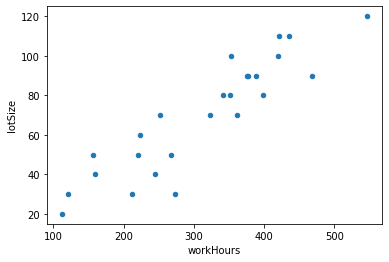

In [21]:
# Plot the predictor against the target. 
toluca_df.plot(kind='scatter', x='workHours', y='lotSize')

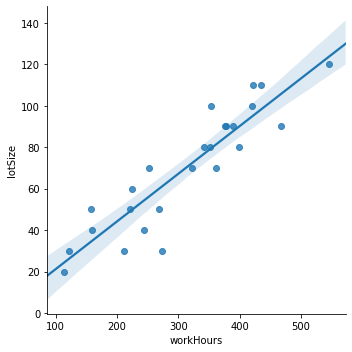

In [22]:
plot = sns.lmplot(x='workHours', y='lotSize', data=toluca_df)
# ci=95 (default), confinence interval

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'workHours')]

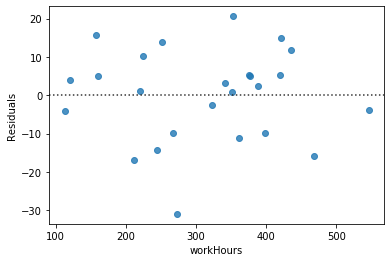

In [23]:
# Plot the residual against the target. 
r1 = sns.residplot('workHours', 'lotSize', data=toluca_df)
r1.set(xlabel='workHours', ylabel='Residuals')
# Ok, Residual is not the distance between y and the predict line in the above graph, but the difference between y and pred_y.

- Based on the scatter plot and residual plot, the predictor 'workHours' looks suitable for SLR. 

In [24]:
# Credit dataset

In [25]:
# Read the data
credit_df = pd.read_csv('../code/data/Credit.csv')
credit_df.head()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance
0,1,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333
1,2,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903
2,3,104.593,7075,514,4,71,11,Male,No,No,Asian,580
3,4,148.924,9504,681,3,36,11,Female,No,No,Asian,964
4,5,55.882,4897,357,2,68,16,Male,No,Yes,Caucasian,331


In [26]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
Unnamed: 0    400 non-null int64
Income        400 non-null float64
Limit         400 non-null int64
Rating        400 non-null int64
Cards         400 non-null int64
Age           400 non-null int64
Education     400 non-null int64
Gender        400 non-null object
Student       400 non-null object
Married       400 non-null object
Ethnicity     400 non-null object
Balance       400 non-null int64
dtypes: float64(1), int64(7), object(4)
memory usage: 37.6+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a25f5aa50>,
      dtype=object)

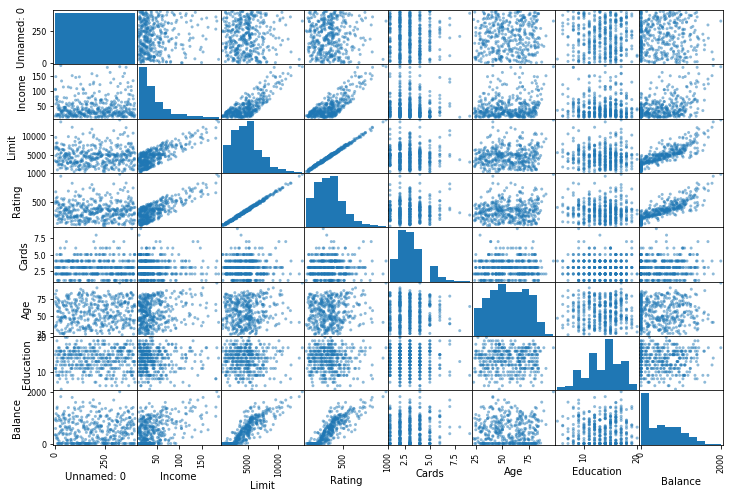

In [27]:
# Plot the predictor against the target. 

# Scatter matrix
scatter_matrix(credit_df, figsize=(12, 8))

- It looks like 'Income', 'Rating', and 'Balance' have some correlation with 'Limit'.

In [28]:
credit_df.corr()

,Unnamed: 0,Income,Limit,Rating,Cards,Age,Education,Balance
Unnamed: 0,1.000000,0.037203,0.024172,0.021985,-0.036304,0.058603,-0.001415,0.006064
Income,0.037203,1.000000,0.792088,0.791378,-0.018273,0.175338,-0.027692,0.463656
Limit,0.024172,0.792088,1.000000,0.996880,0.010231,0.100888,-0.023549,0.861697
Rating,0.021985,0.791378,0.996880,1.000000,0.053239,0.103165,-0.030136,0.863625
Cards,-0.036304,-0.018273,0.010231,0.053239,1.000000,0.042948,-0.051084,0.086456
Age,0.058603,0.175338,0.100888,0.103165,0.042948,1.000000,0.003619,0.001835
Education,-0.001415,-0.027692,-0.023549,-0.030136,-0.051084,0.003619,1.000000,-0.008062
Balance,0.006064,0.463656,0.861697,0.863625,0.086456,0.001835,-0.008062,1.000000


In [29]:
# Split train and test. 

# features: workHours, labels: lotSize
credit_features = credit_df[['Income','Rating','Cards','Age','Education']]
credit_target = credit_df['Limit']
X_train, y_train, X_test, y_test = split_train_test(credit_features, credit_target, 0.2)

In [30]:
# Linear Regression

lin_reg = LinearRegression().fit(X_train, y_train)

In [31]:
# Train the model. 
y_pred = lin_reg.predict(pd.DataFrame(X_test))
y_pred[:10]

array([ 5632.5208458 ,  2758.30915475,  5899.63095162,  2680.56680544,
        8365.5717751 ,  3953.38959354, 11678.78469551,  4957.26342566,
        5199.96287243,  4769.6032206 ])

In [32]:
# Evaluate the model. 
mse = mean_squared_error(y_test, y_pred)
print('RMSE:', np.sqrt(mse))

RMSE: 172.0063624289485


In [33]:
# Coefficients
print('coef_ (slope):', lin_reg.coef_) # Multiple Linear Regression?
print('intercept:', lin_reg.intercept_)

coef_ (slope): [ 3.51557496e-02  1.48526672e+01 -7.51274552e+01  5.36984236e-02
  3.72383659e+00]
intercept: -370.9557213357666


[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Income')]

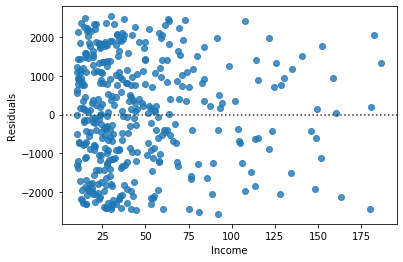

In [34]:
# Plot the residual against the target. 

# predictors: 'Income','Rating','Cards','Age','Education'
# target: 'Limit'
r1 = sns.residplot('Income', 'Limit', data=credit_df)
r1.set(xlabel='Income', ylabel='Residuals')

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Rating')]

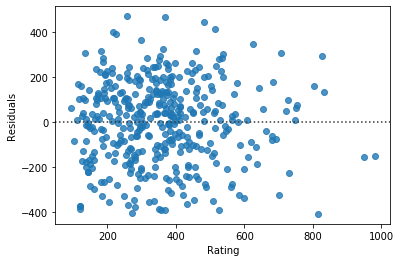

In [35]:
r2 = sns.residplot('Rating', 'Limit', data=credit_df)
r2.set(xlabel='Rating', ylabel='Residuals')

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Cards')]

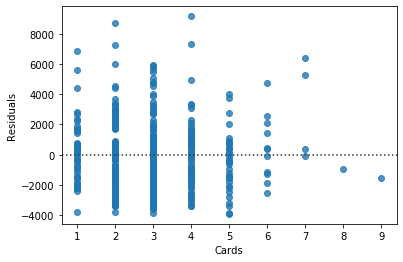

In [36]:
r3 = sns.residplot('Cards', 'Limit', data=credit_df)
r3.set(xlabel='Cards', ylabel='Residuals')

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Age')]

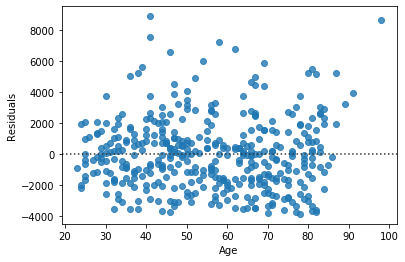

In [37]:
r4 = sns.residplot('Age', 'Limit', data=credit_df)
r4.set(xlabel='Age', ylabel='Residuals')

[Text(0, 0.5, 'Residuals'), Text(0.5, 0, 'Education')]

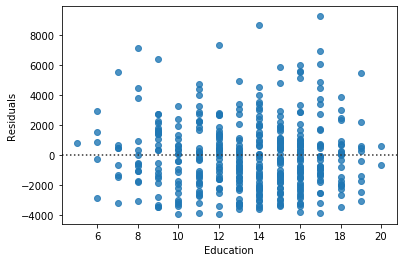

In [38]:
r5 = sns.residplot('Education', 'Limit', data=credit_df)
r5.set(xlabel='Education', ylabel='Residuals')

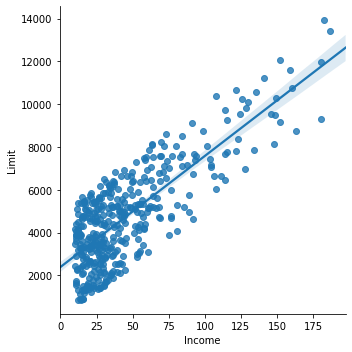

In [39]:
plot = sns.lmplot(x='Income', y='Limit', data=credit_df)

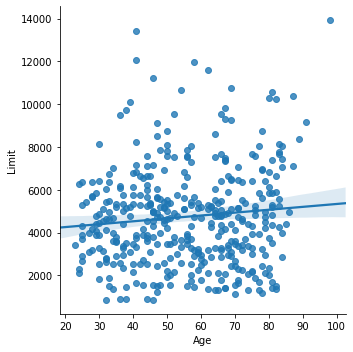

In [40]:
plot = sns.lmplot(x='Age', y='Limit', data=credit_df)

- Among the predictors, it looks like 'Cards', 'Age', and 'Education' are not good predictors. We need further feature engineering. 

In [41]:
# R squared score. 
print('r squared: {:.3f}'.format(lin_reg.score(X_test, y_test)))

r squared: 0.994


- What!? It is very good. 